# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [5]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [6]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# df.head
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [11]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [12]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

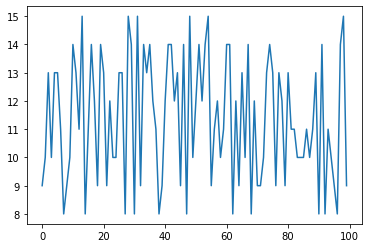

In [13]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

AttributeError: 'Rectangle' object has no property 'bin'

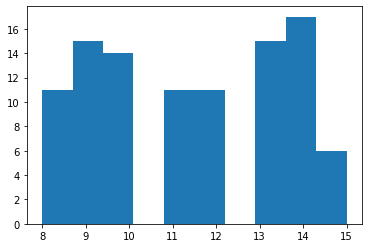

In [16]:
df["國文"].hist(bin=10)
#bin間距

## 3 一些基本的資料分析

算平均。

In [18]:
df["國文"].mean()

11.39

算標準差。

In [13]:
df["國文"].std()

2.1968526614594834

不如就該算的都幫我們算算...

In [20]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [21]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [27]:
df["國文"].corr(df["數學"])
# df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [113]:
df["總級分"]=df.sum(axis=1)
df

,姓名,國文,英文,數學,自然,社會,加權得分,總級分
0,劉俊安,9,10,15,10,13,77,134
1,胡玉華,10,10,10,8,9,63,110
2,黃淑婷,13,15,8,11,14,83,144
3,陳上紫,10,10,8,9,14,69,120
4,崔靜成,13,12,14,12,13,88,152
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,81,136
96,吳筱婷,8,10,14,10,15,77,134
97,陳家銘,14,9,11,8,12,70,124
98,李明威,15,9,8,9,15,74,130


### 【技巧】

有計算的當然也可以的。

In [110]:
df["加權得分"]=df.國文+df.數學+df.英文+df.自然*3+df.社會

In [111]:
df

,姓名,國文,英文,數學,自然,社會,加權得分
0,劉俊安,9,10,15,10,13,77
1,胡玉華,10,10,10,8,9,63
2,黃淑婷,13,15,8,11,14,83
3,陳上紫,10,10,8,9,14,69
4,崔靜成,13,12,14,12,13,88
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,81
96,吳筱婷,8,10,14,10,15,77
97,陳家銘,14,9,11,8,12,70
98,李明威,15,9,8,9,15,74


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [114]:
df.sort_values(by="總級分", ascending=False)
df.head(10)
df

,姓名,國文,英文,數學,自然,社會,加權得分,總級分
0,劉俊安,9,10,15,10,13,77,134
1,胡玉華,10,10,10,8,9,63,110
2,黃淑婷,13,15,8,11,14,83,144
3,陳上紫,10,10,8,9,14,69,120
4,崔靜成,13,12,14,12,13,88,152
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,81,136
96,吳筱婷,8,10,14,10,15,77,134
97,陳家銘,14,9,11,8,12,70,124
98,李明威,15,9,8,9,15,74,130


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [101]:
df2 = df.sort_values(by=["加權得分","總級分"], ascending=False)
df2.head(10)
#["加權得分","總級分"]須以list儲存

,姓名,國文,英文,數學,自然,社會,加權得分,總級分
54,陳怡潔,15,15,9,15,11,95,160
12,李正偉,11,15,11,14,15,94,160
64,俞志峰,9,14,13,14,15,93,158
80,施雅鈴,13,15,12,13,13,92,158
11,周皇樺,13,9,13,14,15,92,156
68,劉麗芬,8,14,14,14,14,92,156
25,蔡亦瑄,13,13,14,13,12,91,156
37,曾怡君,11,12,15,13,14,91,156
57,胡淳茜,12,15,14,13,11,91,156
83,李士賢,10,14,15,13,13,91,156


### 【重點】重設 index

In [116]:
#改column標號
df2.index=range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,加權得分,總級分
1,陳怡潔,15,15,9,15,11,95,160
2,李正偉,11,15,11,14,15,94,160
3,俞志峰,9,14,13,14,15,93,158
4,施雅鈴,13,15,12,13,13,92,158
5,周皇樺,13,9,13,14,15,92,156


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [56]:
df2[df2.數學==15]
# df3 = df2["數學"]==15
# df3
# 後者顯示布林值

,姓名,國文,英文,數學,自然,社會,總級分,加權得分
8,曾怡君,11,12,15,13,14,65,91
10,李士賢,10,14,15,13,13,65,91
17,周育霖,9,12,15,13,12,61,87
26,詹威德,12,13,15,10,14,64,84
33,段冠廷,9,8,15,12,15,59,83
35,林哲法,14,9,15,10,14,62,82
38,陳竹伯,10,12,15,10,14,61,81
48,張雅彬,10,11,15,12,8,56,80
49,胡勝傑,8,11,15,10,15,59,79
61,劉俊安,9,10,15,10,13,57,77


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [85]:
df3 = df2[(df2["數學"]==15) & (df2["英文"]==15)]

df3

,姓名,國文,英文,數學,自然,社會,加權得分
69,吳志遠,13,15,15,8,8,75


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [117]:
df2.drop("總級分", axis=1)
#此時無儲存

,姓名,國文,英文,數學,自然,社會,加權得分
1,陳怡潔,15,15,9,15,11,95
2,李正偉,11,15,11,14,15,94
3,俞志峰,9,14,13,14,15,93
4,施雅鈴,13,15,12,13,13,92
5,周皇樺,13,9,13,14,15,92
...,...,...,...,...,...,...,...
96,林金鳳,8,9,10,10,8,65
97,胡玉華,10,10,10,8,9,63
98,林建亨,9,11,8,8,11,63
99,李曼夢,11,9,11,8,8,63


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [108]:
df.drop("總級分", axis=1, inplace = True)
#inplace = True時有儲存

In [ ]:
### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [123]:
df2.drop(2)

,姓名,國文,英文,數學,自然,社會,加權得分,總級分
1,陳怡潔,15,15,9,15,11,95,160
3,俞志峰,9,14,13,14,15,93,158
4,施雅鈴,13,15,12,13,13,92,158
5,周皇樺,13,9,13,14,15,92,156
6,劉麗芬,8,14,14,14,14,92,156
...,...,...,...,...,...,...,...,...
96,林金鳳,8,9,10,10,8,65,110
97,胡玉華,10,10,10,8,9,63,110
98,林建亨,9,11,8,8,11,63,110
99,李曼夢,11,9,11,8,8,63,110


In [126]:
df2.drop(   df2[df2.姓名=='林建亨'].index   )

,姓名,國文,英文,數學,自然,社會,加權得分,總級分
1,陳怡潔,15,15,9,15,11,95,160
2,李正偉,11,15,11,14,15,94,160
3,俞志峰,9,14,13,14,15,93,158
4,施雅鈴,13,15,12,13,13,92,158
5,周皇樺,13,9,13,14,15,92,156
...,...,...,...,...,...,...,...,...
95,陳欣玲,10,9,13,8,10,66,116
96,林金鳳,8,9,10,10,8,65,110
97,胡玉華,10,10,10,8,9,63,110
99,李曼夢,11,9,11,8,8,63,110


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

In [14]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


### 【例子】 分析 Apple 股價

In [35]:
import pandas_datareader.data as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [36]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-11,27.232500,26.962500,27.129999,26.982500,109938000.0,25.305277
2016-08-12,27.110001,26.945000,26.945000,27.045000,74641600.0,25.363892
2016-08-15,27.385000,27.020000,27.035000,27.370001,103472800.0,25.668697
2016-08-16,27.557501,27.302500,27.407499,27.344999,135177600.0,25.645245
2016-08-17,27.342501,27.084999,27.275000,27.305000,101424000.0,25.607737


#### 只要最後 300 個交易日!

In [42]:
df = df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.615211
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,79.920944
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,82.197174
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.683151
2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400.0,85.294128
...,...,...,...,...,...,...
2021-08-04,147.789993,146.279999,147.270004,146.949997,56368300.0,146.730164
2021-08-05,147.839996,146.169998,146.979996,147.059998,46397700.0,146.839996
2021-08-06,147.110001,145.630005,146.350006,146.139999,54067400.0,146.139999


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

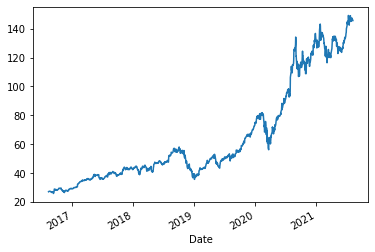

In [37]:
df.Close.plot()

#df.Close.rolling(20).mean()

<AxesSubplot:xlabel='Date'>

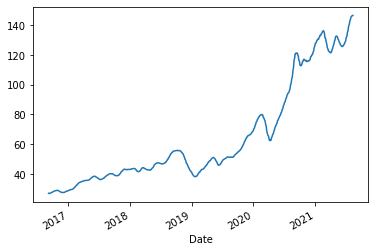

In [38]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

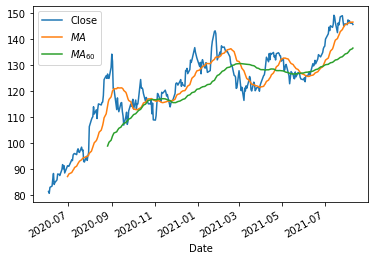

In [58]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)
# $斜
# _{60}下標

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [43]:
result = df.Close.values
len(result)

300

In [46]:
X = result[:-1]
#不包含終始值
len(X)

299

In [51]:
Y = result[1:]
#不包含起始值
len(Y)

299

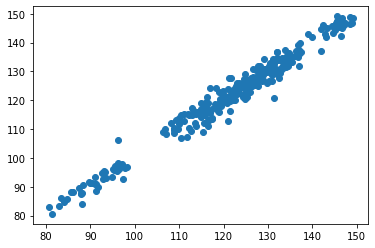

In [60]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mydata = np.random.randn(4,3)

In [63]:
mydata 

array([[ 0.63661384,  0.60112452,  0.5076544 ],
       [ 0.21108417,  0.57438637, -0.64234473],
       [-0.09308302,  0.20718547, -0.48594007],
       [ 0.190438  ,  0.23615422, -1.63785891]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [72]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))
#list("ABC")中ABC一一帶入

In [66]:
df2

,A,B,C
0,0.636614,0.601125,0.507654
1,0.211084,0.574386,-0.642345
2,-0.093083,0.207185,-0.485940
3,0.190438,0.236154,-1.637859


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [73]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [69]:
df3 

,A,B,C
0,1.002096,1.279120,-0.415082
1,0.579560,-0.870035,1.065843
2,1.501209,-2.367454,-0.416895


In [74]:
df4 = pd.concat([df2,df3], axis=0)
#需指定疊加的軸向

In [75]:
df4

,A,B,C
0,0.636614,0.601125,0.507654
1,0.211084,0.574386,-0.642345
2,-0.093083,0.207185,-0.485940
3,0.190438,0.236154,-1.637859
0,1.011242,-0.345458,-0.629261
1,1.737444,-1.275546,1.393638
2,-0.306601,-1.510547,0.719634


前面我們弄得亂七八糟的 index 重設一下。

In [76]:
df4.index= range(7)

In [77]:
df4

,A,B,C
0,0.636614,0.601125,0.507654
1,0.211084,0.574386,-0.642345
2,-0.093083,0.207185,-0.485940
3,0.190438,0.236154,-1.637859
4,1.011242,-0.345458,-0.629261
5,1.737444,-1.275546,1.393638
6,-0.306601,-1.510547,0.719634


#### 横向的貼

In [78]:
df5 = pd.concat([df2,df3], axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [79]:
df5

,A,B,C,A,B,C
0,0.636614,0.601125,0.507654,1.011242,-0.345458,-0.629261
1,0.211084,0.574386,-0.642345,1.737444,-1.275546,1.393638
2,-0.093083,0.207185,-0.485940,-0.306601,-1.510547,0.719634
3,0.190438,0.236154,-1.637859,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [92]:
df_names = pd.read_csv("data/names.csv", names=["姓名"])

In [93]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [94]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [97]:
df_grades.to_csv("data/grades2.csv", index = 0)
#index = 0表不要存入

In [98]:
df_grades2 = pd.read_csv("data/grades2.csv")
df_grades2

,國文,英文,數學,社會,自然
0,14,13,12,12,11
1,12,11,9,14,15
2,7,13,7,15,12
3,11,15,10,15,7
4,14,12,10,8,9
...,...,...,...,...,...
95,13,9,11,7,6
96,9,15,9,12,15
97,9,15,8,8,11
98,10,7,6,9,7


In [99]:
df_new =pd.concat([df_names,df_grades],axis=1)

In [100]:
df_new

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,14,13,12,12,11
1,王紹尹,12,11,9,14,15
2,黃季坤,7,13,7,15,12
3,許正書,11,15,10,15,7
4,張鈞蓮,14,12,10,8,9
...,...,...,...,...,...,...
95,陳君生,13,9,11,7,6
96,曾桂甫,9,15,9,12,15
97,林欣怡,9,15,8,8,11
98,林佳霖,10,7,6,9,7
